## The objective of this homework was to treat the data of all the reported earthquakes from the years 1904 to 2017 with a magnitude greater than 5 units.

In [1]:
# Importing libraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

## A. Series

#### a) Retrieving the series contained in the Earthquake.dat

In [2]:
file ='EARTHQUAKE.dat'
columns = ["YEAR", "MONTH", "DAY", "HOUR", "MAGNITUDE"]
df = pd.read_csv(file, delim_whitespace = True, header = None, names = columns)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41710 entries, 0 to 41709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       41710 non-null  float64
 1   MONTH      41710 non-null  float64
 2   DAY        41710 non-null  float64
 3   HOUR       41710 non-null  float64
 4   MAGNITUDE  41710 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [4]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MAGNITUDE
count,41710.000000,41710.000000,41710.000000,41710.000000,41710.000000
mean,1979.391753,6.531887,15.681683,0.498835,5.829838
std,26.196309,3.419229,8.742003,0.288195,0.497847
min,1904.000000,1.000000,1.000000,0.000005,4.750000
25%,1965.000000,4.000000,8.000000,0.250703,5.520000
50%,1983.000000,7.000000,16.000000,0.497684,5.730000
75%,2001.000000,9.000000,23.000000,0.748493,6.070000
max,2017.000000,12.000000,31.000000,0.999995,9.550000


In [5]:
df.head()

,YEAR,MONTH,DAY,HOUR,MAGNITUDE
0,1904.0,4.0,4.0,0.418456,6.84
1,1904.0,4.0,4.0,0.434732,7.02
2,1904.0,6.0,25.0,0.615036,7.50
3,1904.0,6.0,25.0,0.875448,7.70
4,1904.0,12.0,20.0,0.239125,7.29


#### b) Retrieving the date from the corresponding informative columns

In [6]:
df['YEAR'] = df['YEAR'].astype('int')
df['MONTH'] = df['MONTH'].astype('int')
df['DAY'] = df['DAY'].astype('int')
df['HOUR'] = (df['HOUR']*24).astype('float')
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY','HOUR']])

In [7]:
df['DATE']

0       1904-04-04 10:02:34.560384
1       1904-04-04 10:26:00.880224
2       1904-06-25 14:45:39.139776
3       1904-06-25 21:00:38.720160
4       1904-12-20 05:44:20.439744
                   ...            
41705   2017-12-28 17:20:21.289632
41706   2017-12-28 21:40:54.409728
41707   2017-12-29 21:20:52.789632
41708   2017-12-29 23:55:54.640416
41709   2017-12-30 20:53:25.100160
Name: DATE, Length: 41710, dtype: datetime64[ns]

#### c) Retrieving the data collected throughout the years 1910 and 2017 of the earthquakes with amplitude >= 6

In [8]:
df_reduced = df[(df.MAGNITUDE >= 6) & ((df.YEAR >= 1910) & (df.YEAR <= 2017))].reset_index()

In [9]:
df_reduced.head()

,index,YEAR,MONTH,DAY,HOUR,MAGNITUDE,DATE
0,199,1910,1,1,11.032980,6.83,1910-01-01 11:01:58.729728
1,200,1910,1,8,14.823505,6.59,1910-01-08 14:49:24.619584
2,201,1910,1,22,8.807005,6.98,1910-01-22 08:48:25.219584
3,202,1910,1,23,18.823167,6.53,1910-01-23 18:49:23.399904
4,204,1910,4,12,0.373556,8.10,1910-04-12 00:22:24.800016


#### d) Creating a new matrix containing the data retrieved in points b) and magnitude

In [10]:
matrixB = df_reduced[['DATE','MAGNITUDE']]

print("Dimension of the matrix B is", matrixB.shape)

Dimension of the matrix B is (12028, 2)


In [11]:
print("First three rows:\n")
matrixB.head(3)

First three rows:



,DATE,MAGNITUDE
0,1910-01-01 11:01:58.729728,6.83
1,1910-01-08 14:49:24.619584,6.59
2,1910-01-22 08:48:25.219584,6.98


#### e) Making a graph of the resulting time series (1910 - 2017)

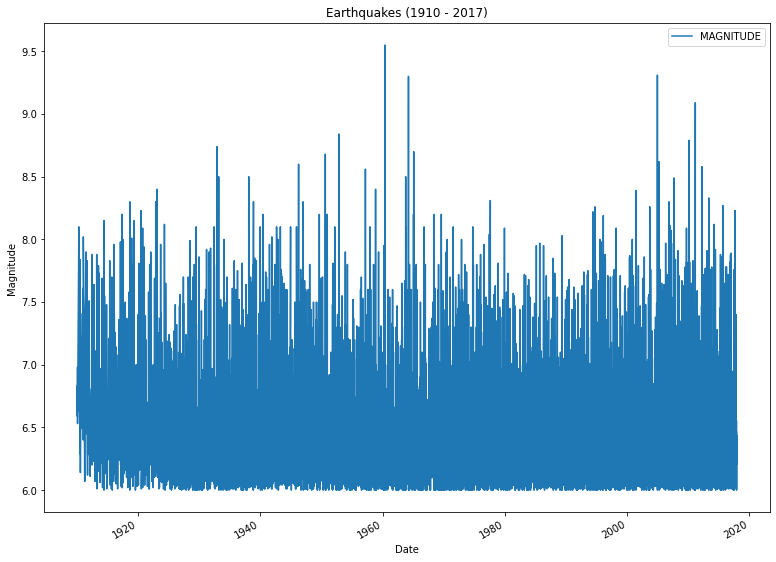

In [12]:
matrixB.plot(x ='DATE', y ='MAGNITUDE', xlabel ='Date',ylabel ='Magnitude',title ="Earthquakes (1910 - 2017)", figsize=(13,10))
plt.show()

## B. Categorization

#### a) Counting the number of earthquakes categorized by magnitude intervals

The earthquakes were split into 4 different categories by magnitude:
1. Between 6 and 6.99 (6 <= x < 7)
2. 7 and 7.99 (7 <= x < 8)
3. 8 and 8.99 (8 <= x < 9)
4. and greater than 9 (9 <= x)

In [13]:
matrixB.MAGNITUDE.min()

6.0

In [14]:
magnitude = ['6 <= x < 7','7 <= x < 8','8 <= x < 9','9 <= x']
bins = [6, 7, 8, 9, 10]
categorized_by_magnitude = pd.cut(matrixB.MAGNITUDE, bins, labels =
magnitude, right=False)

print(categorized_by_magnitude.value_counts())

6 <= x < 7    10787
7 <= x < 8     1157
8 <= x < 9       80
9 <= x            4
Name: MAGNITUDE, dtype: int64


#### b) Counting the number of earthquakes categorized by magnitude intervals and 10-years gap intervals

In [15]:
def get_interval(start, end):
    return matrixB[(matrixB.DATE.dt.year >= start) & (matrixB.DATE.dt.year < end)]

c_all = []
c_index = []

for i, year, in enumerate(range(matrixB.DATE.dt.year.min(), matrixB.DATE.dt.year.max(), 10)):
    interval = get_interval(year, year + 10).copy()
    vals = pd.cut(interval.MAGNITUDE, (6,7,8,9,10), right=False, labels = magnitude)
    counts = vals.value_counts()
    year_gap = f'{i}-{i+9}'
    
    c_all.append(counts)
    c_index.append(interval.iloc[0, :].DATE.year)

In [16]:
matrixC_10 = pd.DataFrame({
    'DATE': c_index,
})

matrixC_10 = pd.concat((C_10, pd.DataFrame(c_all).reset_index(drop=True)), axis=1)

In [17]:
matrixC_10

,DATE,6 <= x < 7,7 <= x < 8,8 <= x < 9,9 <= x
0,1910,424,86,10,0
1,1920,827,100,6,0
2,1930,932,110,7,0
3,1940,807,109,10,0
4,1950,1168,81,7,0
5,1960,1067,113,9,2
6,1970,1119,122,8,0
7,1980,1103,91,1,0
8,1990,1151,119,5,0
9,2000,1207,117,10,1


In [18]:
matrixC = matrixB.copy()
matrixC['MAGNITUDE'] = categorized_by_magnitude
matrixC = matrixC.groupby([matrixC.DATE.dt.year, 'MAGNITUDE']).size().unstack()[magnitude]

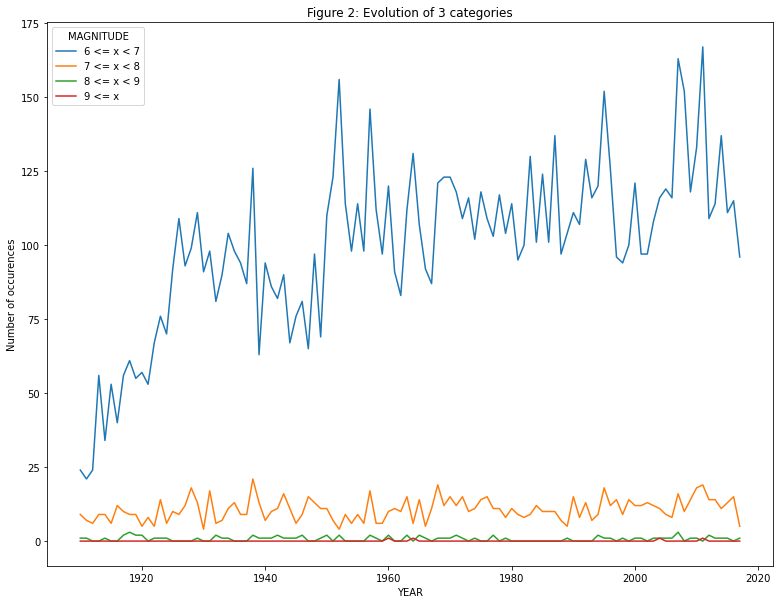

In [19]:
matrixC.plot(title='Figure 2: Evolution of 3 categories', ylabel="Number of occurences", xlabel='YEAR', figsize=(13,10))
plt.show()

## Mean and Meadian

## A. Mean

#### a) Calculating the mean value and its first, second, and third standard deviations

In [20]:
mean = matrixB.MAGNITUDE.mean()

std1 = matrixB.MAGNITUDE.std()
std2 = 2 * std1
std3 = 3 * std1

t_mean_std = pd.Series({
    'mean': mean,
    'std1': std1,
    'std2': std2,
    'std3': std3})

print(t_mean_std)

mean    6.432369
std1    0.420982
std2    0.841963
std3    1.262945
dtype: float64


#### b) Plotting matrixB regarding time, its mean and its mean +/-std1, mean +/-std2, mean +/-std3

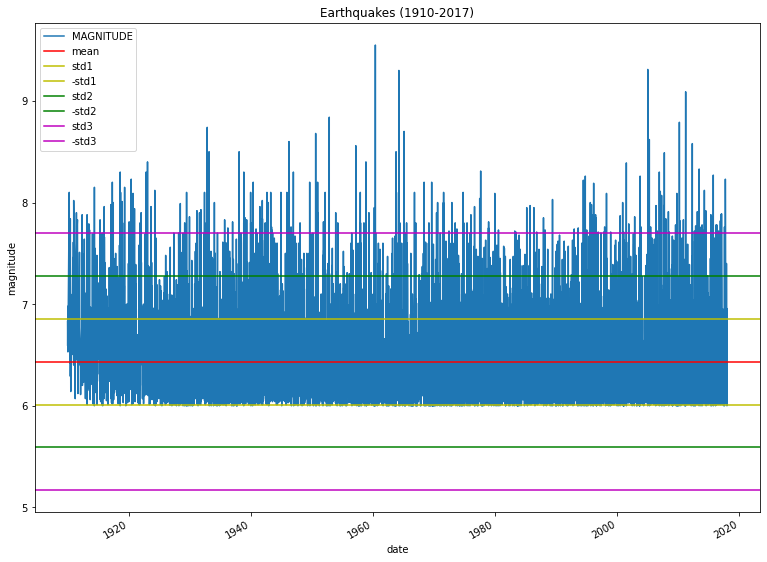

In [21]:
matrixB.plot(x ='DATE', y ='MAGNITUDE', xlabel ='date', ylabel ='magnitude', title ="Earthquakes (1910-2017)", figsize=(13,10))

plt.axhline(mean, label ='mean', c ='r')

plt.axhline(mean + std1, label ='std1',  c ='y')
plt.axhline(mean - std1, label ='-std1', c ='y')

plt.axhline(mean + std2, label ='std2', c ='g')
plt.axhline(mean - std2, label ='-std2', c ='g')

plt.axhline(mean + std3, label ='std3', c ='m')
plt.axhline(mean - std3, label ='-std3', c ='m')

plt.legend()
plt.show()

#### c) Finding the percentage of values of magnitudes which are below std1 (< std1), between std1 and std2 (std1 <= x <= std2), above std3 (x > std3)

In [22]:
below_std1 = matrixB[(matrixB.MAGNITUDE > mean - std1) & (matrixB.MAGNITUDE < mean + std1)]

between_std1_std2 = matrixB[(matrixB.MAGNITUDE >= mean+ std1) & (matrixB.MAGNITUDE <= mean +std2)]

above_std3 = matrixB[(matrixB.MAGNITUDE > mean + std3)]

numbers = pd.Series({'below std1': below_std1.shape[0],'between std1 and std2': between_std1_std2.shape[0],
                     'above std3': above_std3.shape[0]})

percentages = pd.Series({'% std1': numbers[0] / matrixB.shape[0] * 100,'% std2': numbers[1] / matrixB.shape[0] * 100,
                         '% std3': numbers[2] / matrixB.shape[0] * 100})

print(percentages)

% std1    80.961091
% std2     8.829398
% std3     2.045228
dtype: float64
